# Neural Network

Data:
$f(x) = (x^3) +(3x^2)-2$<br>



The Alrorightm itself consists of three components:
1.  Hypothesis: $h_w(x) = U_kz_k + c_k$
2.  Loss: $\frac{1}{N}\sum_{i=1}^n(y_i-\hat{y}_i)^2$ 

3.  Optimization: <br>
$ \substack{minimize\\w} J(w) = \frac{1}{m}\sum_{i=1}^m l[h_w(x_i),y_i)]$<br>
$w \leftarrow -\alpha\Delta J(w)$



Neural Network:<br>
$h_w(x) = U_3\sigma(U_2\sigma(U_1x+b_1)+b_2)+b_3$



   


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Data 

In [2]:
def generate_training_points(n):
    training_points = []
    f = lambda x: (x**3)+(3*x**2)-(2)
    
    for s in np.linspace(-3,2,n):
        training_points.append([s,f(s)])
        
    return np.array(training_points)
    

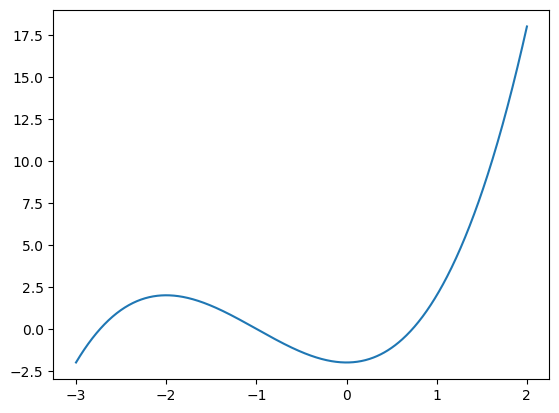

In [3]:
data = generate_training_points(1000)

X = data[:,0]
Y_hat = data[:,1]
N = len(data)


plt.plot(data[:,0],data[:,1])

## Network

In [4]:
U_1 = np.random.normal(size=(300,1))
b_1 = np.zeros((300,1))

U_2 =  np.random.normal(size=(300,300))
b_2 = np.zeros((300,1))

U_3 = np.random.normal(size=(1,300))
b_3 = np.zeros((1,1))



In [5]:
def sigmoid(x):
    return np.exp(x) / (np.exp(x) +1)

def derivative_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def derivative_relu(x):
    return np.greater(x, 0.).astype(np.float32)

def SE(y, y_hat):
    return np.square(y-y_hat)
    

In [6]:
def feed_forward(x,U_1,b_1,U_2,b_2,U_3,b_3):
    z1 = U_1.dot(x)+b_1
    a1 = sigmoid(z1)
    
    z2 = U_2.dot(a1)+b_2
    a2 = sigmoid(z2)
    
    z3 = U_3.dot(a2)+b_3
    # No activation function since we use it for regression.
    
    return z3

def backprop(x,U_1,b_1,U_2,b_2,U_3,b_3,y_hat,alpha):
    
    z1 = U_1.dot(x)+b_1
    a1 = sigmoid(z1)
    
    z2 = U_2.dot(a1)+b_2
    a2 = sigmoid(z2)
    
    z3 = U_3.dot(a2)+b_3
    # No activation function since we use it for regression.
    
 ############### BACKPROP ################

    dl_dyhat = 2*(z3-y_hat)
    
    dl_dg = dl_dyhat
    dl_db3 = dl_dyhat
    
    dl_df = U_3*dl_dg
    dl_dU3 = a2*dl_dg
    
    dl_de = derivative_sigmoid(z2)*dl_df.T
    
    dl_dd = dl_de
    dl_db2 = dl_de
    
    dl_dc =U_2.dot(dl_dd)
    dl_dU2 = a1*dl_dd
    
    dl_db = derivative_sigmoid(z1)*dl_dc
    
    dl_da = dl_db
    dl_db1 = dl_db
    
    dl_dU1 = dl_da*x.T

    
    U_1 -= alpha*dl_dU1
    b_1 -= alpha*dl_db1
    
    U_2 -= alpha*dl_dU2
    b_2 -= alpha*dl_db2
    
    U_3 -= alpha*dl_dU3.T
    b_3 -= alpha*dl_db3
    

    
    return (U_1,b_1,U_2,b_2,U_3,b_3)

In [7]:
def train(U_1,b_1,U_2,b_2,U_3,b_3,X,Y_hat,N,epochs, alpha):
    loss = []
    for e in range(epochs):
        l = []
        for i in range(len(X)):
            y = feed_forward(X[i],U_1,b_1,U_2,b_2,U_3,b_3)
            l.append(SE(y,Y_hat[i]))
            U_1,b_1,U_2,b_2,U_3,b_3 = backprop(X[i],U_1,b_1,U_2,b_2,U_3,b_3,Y_hat[i],alpha)
        loss.append(sum(l)/len(X))   
        
        print(f"Epoch: {e+1}, loss = {loss[-1]}")
    return (U_1, b_1, U_2, b_2,U_3,b_3,np.array(loss).reshape(-2))

In [8]:
epochs = 1000
alpha = 1e-4
r = train(U_1,b_1,U_2,b_2,U_3,b_3,X,Y_hat,N,epochs=epochs,alpha=alpha)

Epoch: 1, loss = [[3.0114549]]
Epoch: 2, loss = [[1.68702442]]
Epoch: 3, loss = [[0.67086292]]
Epoch: 4, loss = [[0.57739903]]
Epoch: 5, loss = [[0.41466201]]
Epoch: 6, loss = [[0.32381768]]
Epoch: 7, loss = [[0.34820224]]
Epoch: 8, loss = [[0.43706883]]
Epoch: 9, loss = [[0.51430395]]
Epoch: 10, loss = [[0.53265798]]
Epoch: 11, loss = [[0.49292557]]
Epoch: 12, loss = [[0.41886898]]
Epoch: 13, loss = [[0.33590191]]
Epoch: 14, loss = [[0.26212299]]
Epoch: 15, loss = [[0.20601819]]
Epoch: 16, loss = [[0.16811553]]
Epoch: 17, loss = [[0.1446172]]
Epoch: 18, loss = [[0.13100967]]
Epoch: 19, loss = [[0.12389352]]
Epoch: 20, loss = [[0.12105775]]
Epoch: 21, loss = [[0.12097972]]
Epoch: 22, loss = [[0.12245211]]
Epoch: 23, loss = [[0.12443487]]
Epoch: 24, loss = [[0.12605025]]
Epoch: 25, loss = [[0.12663642]]
Epoch: 26, loss = [[0.12579832]]
Epoch: 27, loss = [[0.12341928]]
Epoch: 28, loss = [[0.11962035]]
Epoch: 29, loss = [[0.11467454]]
Epoch: 30, loss = [[0.10890284]]
Epoch: 31, loss = [[0

In [9]:
pred = []
for x in X:
    pred.append(feed_forward(x,r[0],r[1],r[2],r[3],r[4],r[5]).reshape(1))


print(f"Loss (MSE): {r[6][-1]}")


Loss (MSE): 0.018048497879111784


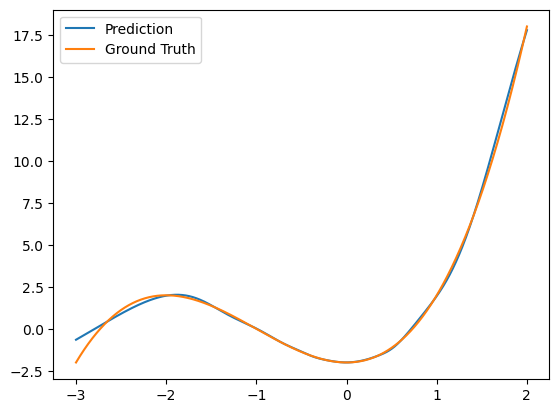

In [10]:
plt.plot(X,pred,X,Y_hat)
plt.legend(["Prediction","Ground Truth"])

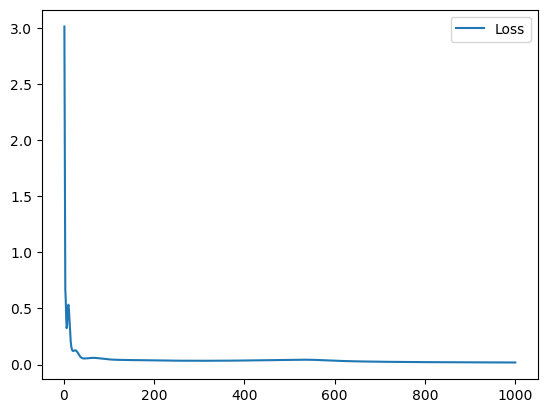

In [11]:
plt.plot(range(1,epochs+1),r[6])
plt.legend(["Loss"])